<a href="https://colab.research.google.com/github/SoumajitPal/Sleep-Disorder-Prediction/blob/main/Sleep_Disorder_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project: Sleep Disorder Prediction**

**Overview**

This project aims to analyze and predict the likelihood of sleep disorders based on various health and lifestyle factors. Sleep disorders significantly impact physical and mental well-being, making early detection and intervention essential for improving overall health outcomes.We use a Decision Tree and Random Forest model for prediction and classification tasks. This project highlights critical insights into the factors influencing sleep disorders and provides a predictive tool that can aid healthcare providers and researchers in developing targeted interventions to improve sleep health.

**1. Importing Required Libraries**

Here, we import essential libraries:

1. Pandas: Used for data manipulation and analysis. It provides powerful tools for handling tabular data.
2. NumPy: Offers support for numerical operations, enabling efficient computations and handling of arrays.
3. Seaborn: A visualization library built on top of Matplotlib, used for creating informative and attractive statistical graphics.
4. Matplotlib.pyplot: A core library for creating static, animated, and interactive visualizations in Python.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**2. Loading the Dataset**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Sleep_health_and_lifestyle_dataset.csv to Sleep_health_and_lifestyle_dataset (1).csv


files.upload() is used to upload a file from the local machine to the Google Colab environment. A file picker dialog appears, allowing you to select the dataset (in this case, Sleep_health_and_lifestyle_dataset.csv).
The uploaded file is temporarily stored in the Colab session and is accessible by its filename.

**3. Data Preprocessing**

In [ ]:
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


The pd.read_csv function reads the uploaded CSV file and converts it into a Pandas DataFrame. While the head() function displays the first 5 rows of the dataset to understand its structure and content.

In [ ]:
df.tail()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
373,374,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


The tail() function displays the last 5 rows of the dataset to understand its structure and content.

In [ ]:
df.isnull().sum()

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


Identifies columns with missing values and the total count for each. This helps determine if imputation or removal of rows/columns is necessary. Since the value for SleepOrder is not zero we have to modify the null values.

In [ ]:
df.fillna({"Sleep Disorder": "None"}, inplace=True)

Replaces missing values in the "Sleep Disorder" column with "None" directly in the DataFrame.

In [ ]:
df.drop('Person ID', axis=1, inplace=True)

Drops the "Person ID" column from the DataFrame permanently.

In [ ]:
for col in df.columns:
    print(col,df[col].nunique())

Gender 2
Age 31
Occupation 11
Sleep Duration 27
Quality of Sleep 6
Physical Activity Level 16
Stress Level 6
BMI Category 4
Blood Pressure 25
Heart Rate 19
Daily Steps 20
Sleep Disorder 3


Iterates through each column in the DataFrame, printing the column name and the count of unique values in that column.

In [ ]:
df['systolic_bp'] = df['Blood Pressure'].apply(lambda x: x.split('/')[0])
df['diastolic_bp'] = df['Blood Pressure'].apply(lambda x: x.split('/')[1])
df.drop('Blood Pressure', axis=1, inplace=True)

Extracts systolic and diastolic blood pressure values from the "Blood Pressure" column, creates two new columns (systolic_bp and diastolic_bp), and then removes the original "Blood Pressure" column from the DataFrame.

In [ ]:
df['BMI Category'] = df['BMI Category'].replace('Normal Weight', 'Normal')

Replaces occurrences of "Normal Weight" with "Normal" in the "BMI Category" column of the DataFrame.

In [ ]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,systolic_bp,diastolic_bp
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90


Again we display the first 5 rows of the dataset after removing Person ID to understand its structure and content.

**4. Exploratory Data Analysis**

**Health Patterns and Trends**

<Axes: xlabel='Sleep Disorder', ylabel='count'>

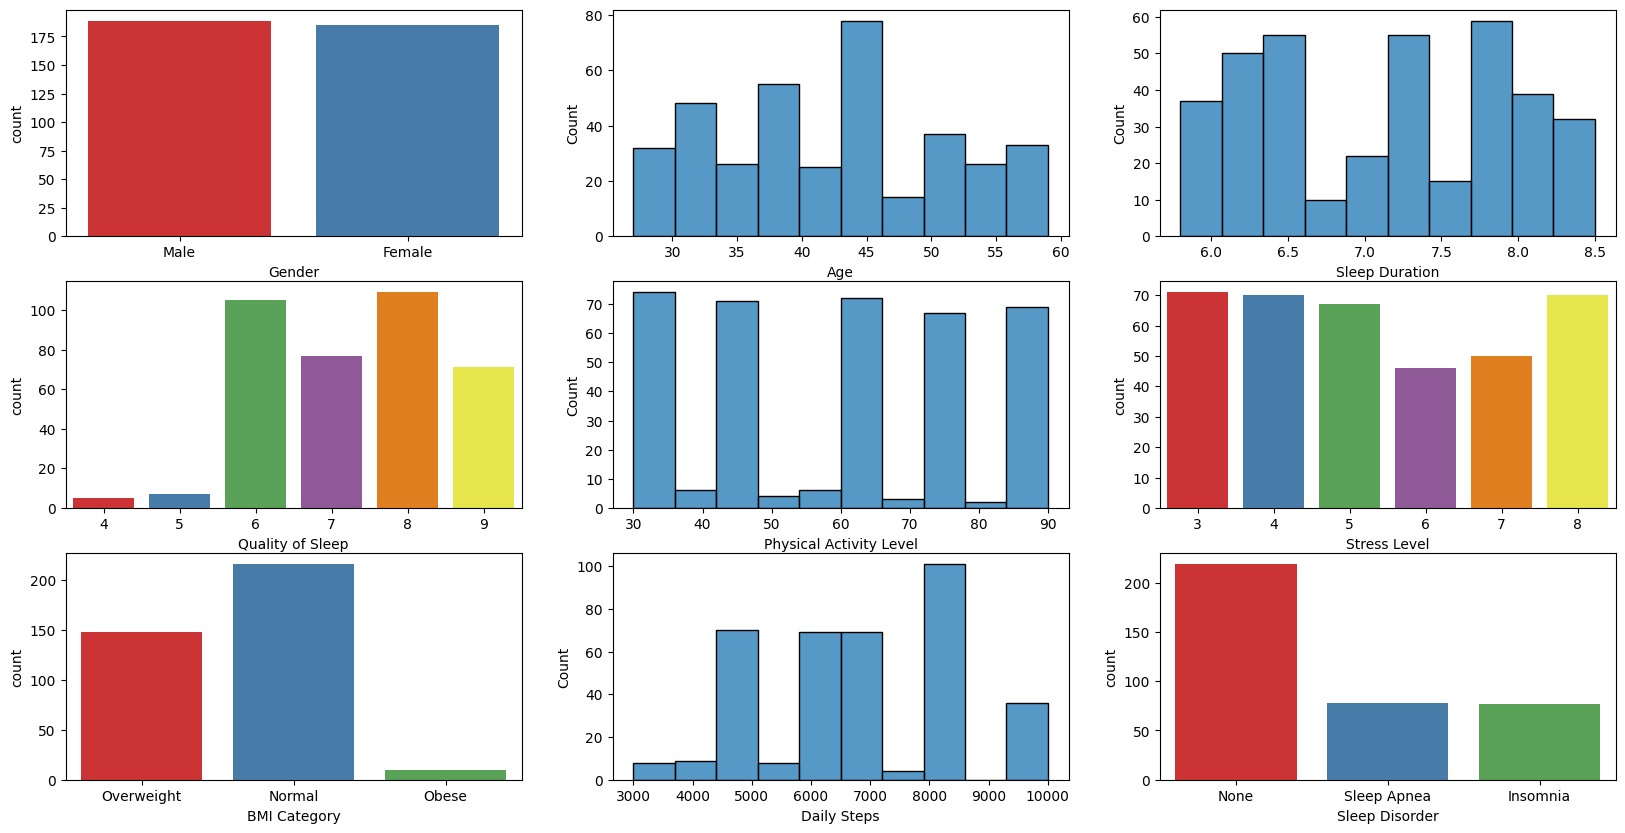

In [ ]:
fig,ax = plt.subplots(3,3,figsize=(20,10))
sns.countplot(x='Gender', data=df, ax=ax[0, 0], hue='Gender', palette="Set1", legend=False)
sns.histplot(x = 'Age', data = df, ax = ax[0,1], bins = 10)
sns.histplot(x = 'Sleep Duration', data = df, ax = ax[0,2], bins = 10)
sns.countplot(x='Quality of Sleep', data=df, ax=ax[1, 0], hue='Quality of Sleep', palette="Set1", legend=False)
sns.histplot(x = 'Physical Activity Level', data = df, ax = ax[1,1], bins = 10)
sns.countplot(x='Stress Level', data=df, ax=ax[1, 2], hue='Stress Level', palette="Set1", legend=False)
sns.countplot(x='BMI Category', data=df, ax=ax[2, 0], hue='BMI Category', palette="Set1", legend=False)
sns.histplot(x = 'Daily Steps', data = df, ax = ax[2,1], bins = 10)
sns.countplot(x='Sleep Disorder', data=df, ax=ax[2, 2], hue='Sleep Disorder', palette="Set1", legend=False)

**Observations:**
1. Gender:There appears to be a larger number of female participants compared to male participants.

2. Age:The age distribution seems to be centered around the mid-40s with a slight skew towards older ages.

3. Sleep Duration:The sleep duration appears to be centered around 7-8 hours, with a slight skew towards longer sleep durations.

4. Quality of Sleep:The distribution of sleep quality appears to be skewed towards lower values, suggesting that many participants might be experiencing suboptimal sleep quality.

5. Physical Activity Level:The physical activity level distribution is skewed towards lower values, indicating that a significant portion of the study participants might have low levels of physical activity.

6. Stress Level:The stress level distribution is skewed towards higher values, suggesting that many participants might be experiencing moderate to high levels of stress.

7. BMI Category:The BMI distribution is skewed towards the overweight and obese categories, indicating a higher prevalence of overweight and obesity among the study participants.

8. Daily Steps:The daily step distribution is skewed towards lower values, suggesting that many participants might not be meeting the recommended daily step count.

9. Sleep Disorder:The sleep disorder distribution is skewed towards the "None" category, indicating that most participants do not have a diagnosed sleep disorder. However, there is a significant number of participants with sleep apnea and insomnia.

Inferences:
1. The study population appears to be predominantly middle-aged to older females.

2. Many participants might be experiencing suboptimal sleep quality, low physical activity levels, and high stress levels.

3. Overweight and obesity are prevalent among the study participants.

4. Most participants do not have a diagnosed sleep disorder, but there is a significant number with sleep apnea and insomnia.

**Gender and Sleep Disorder**

Text(0.5, 1.0, 'Gender and Sleep Disorder')

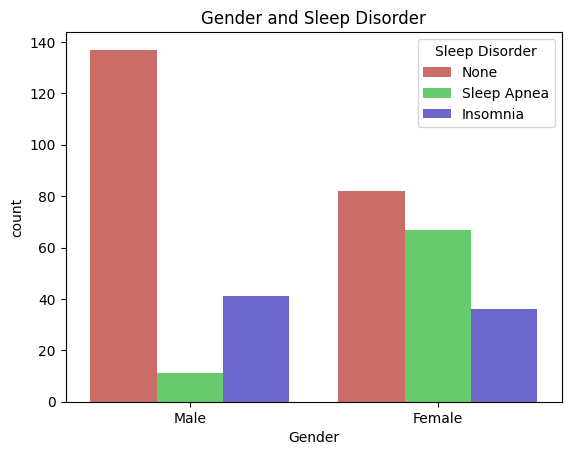

In [ ]:
sns.countplot(x = 'Gender', data = df, palette = 'hls', hue = 'Sleep Disorder').set_title('Gender and Sleep Disorder')

**Observations:**
1. More females reported having sleep disorders compared to males.
2. Sleep apnea and insomnia were more prevalent among females.
3. A higher proportion of males reported having no sleep disorder.

**Inferences:**
1. Females may be more susceptible to sleep disorders like sleep apnea and insomnia than males.
2. There may be underlying biological, hormonal, or lifestyle factors contributing to this gender disparity.

**Sleep Disorder By Occupation**

<ipython-input-37-5c628fb9ff2f>:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)


[Text(0, 0, 'Software Engineer'),
 Text(1, 0, 'Doctor'),
 Text(2, 0, 'Sales Representative'),
 Text(3, 0, 'Teacher'),
 Text(4, 0, 'Nurse'),
 Text(5, 0, 'Engineer'),
 Text(6, 0, 'Accountant'),
 Text(7, 0, 'Scientist'),
 Text(8, 0, 'Lawyer'),
 Text(9, 0, 'Salesperson'),
 Text(10, 0, 'Manager')]

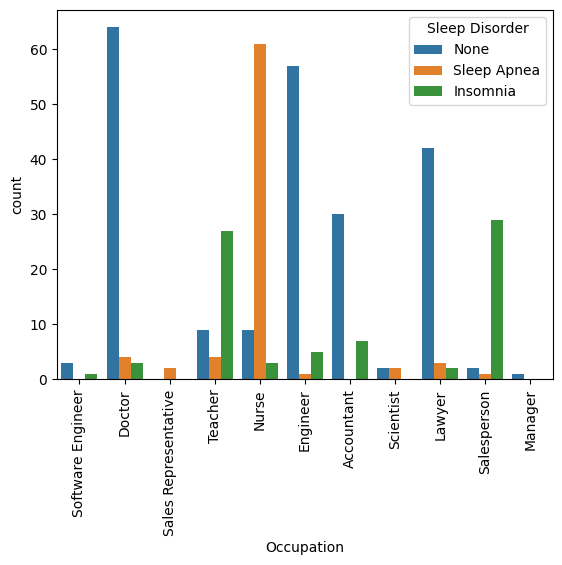

In [ ]:
ax = sns.countplot(x = 'Occupation', data = df, hue = 'Sleep Disorder')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

**Observations:**
1. The distribution of sleep disorders varies across different occupations.

2. Software Engineers seem to have a higher prevalence of sleep apnea compared to other professions.

3. Nurses and Doctors have a higher prevalence of insomnia, which might be attributed to the demanding nature of their jobs.

4. Accountants and Scientists have a higher prevalence of no reported sleep disorder.

**Inferences:**

1. Occupational Stress: Occupations with high levels of stress, such as nursing, medicine, and software engineering, might be associated with a higher risk of sleep disorders.

2. Shift Work: Shift work, common in many professions like nursing and engineering, can disrupt sleep patterns and increase the risk of sleep disorders.

3. Sedentary Lifestyle: Some occupations, like accounting and scientific research, might involve long hours of sedentary work, which can negatively impact sleep quality.

**BMI Category and Sleep Disorder**

Text(0.5, 1.0, 'BMI Category and Sleep Disorder')

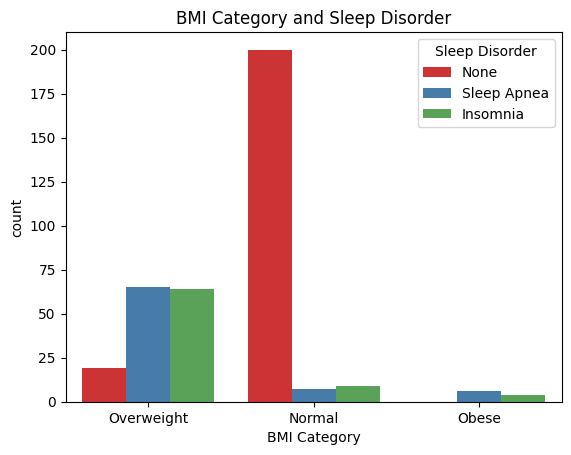

In [ ]:
sns.countplot(x = 'BMI Category', hue = 'Sleep Disorder', data = df, palette = 'Set1').set_title('BMI Category and Sleep Disorder')

**Observations:**
1. The majority of participants classified as Normal BMI do not have any reported sleep disorder.

2. Overweight and Obese individuals have a higher prevalence of sleep apnea compared to those with a normal BMI.

3. Insomnia seems to be relatively evenly distributed across all BMI categories.

**Inferences:**
1. Obesity and Sleep Apnea: There appears to be a strong association between obesity and sleep apnea. This is likely due to the increased pressure on the airways during sleep, which can lead to breathing difficulties.

2. BMI and Sleep Quality: While obesity is associated with sleep apnea, it's important to note that other factors, such as lifestyle and stress, can also influence sleep quality.

**5. Feature Engineering**

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()


This snippet imports the LabelEncoder class from sklearn.preprocessing and initializes a label_encoder instance, which is used to convert categorical labels into numeric format.

In [ ]:
vars = ['Gender', 'Occupation','BMI Category','Sleep Disorder']
for i in vars:
    label_encoder.fit(df[i].unique())
    df[i] = label_encoder.transform(df[i])
    print(i,':' ,df[i].unique())

Gender : [1 0]
Occupation : [ 9  1  6 10  5  2  0  8  3  7  4]
BMI Category : [2 0 1]
Sleep Disorder : [1 2 0]


Encodes the specified categorical columns (Gender, Occupation, BMI Category, Sleep Disorder) into numeric format using a label encoder, and prints the column name along with its unique transformed values.

**Correlation**

<Axes: >

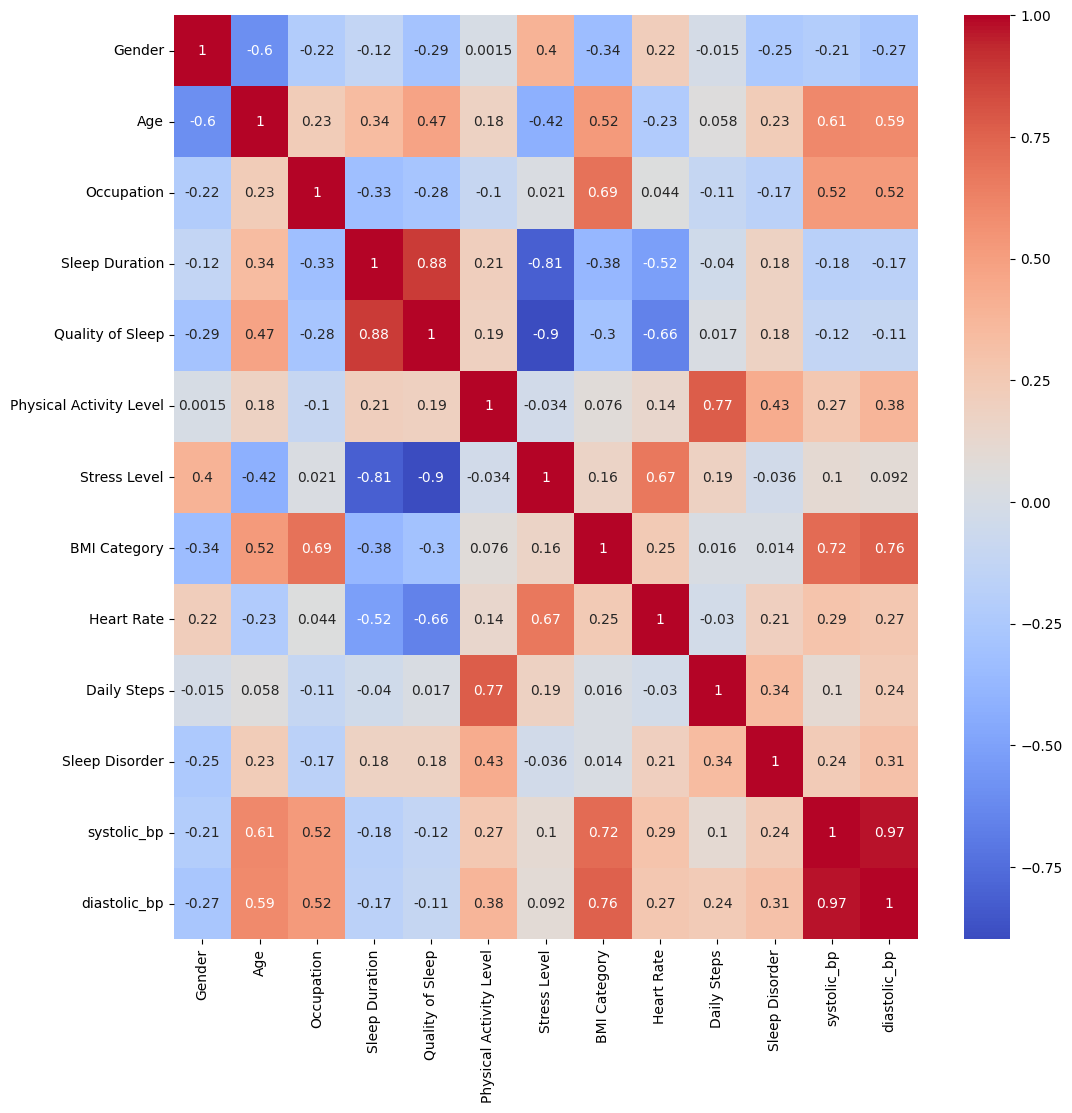

In [ ]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')

**Strong Positive Correlations:**
1. BMI and Sleep Disorder: This reinforces the link between obesity and sleep disorders, particularly sleep apnea.

2. Heart Rate, Systolic Blood Pressure, and Diastolic Blood Pressure: These variables are closely interconnected, indicating a strong relationship between cardiovascular health and blood pressure.

3. Daily Steps and Physical Activity Level: This confirms that increasing physical activity, as measured by daily steps, is beneficial for overall health.


**Strong Negative Correlations:**
1. Quality of Sleep and Stress Level: This highlights the importance of adequate sleep for stress management and mental health.

2. Occupation and Sleep Duration: Certain occupations, particularly those with demanding schedules or shift work, can negatively impact sleep duration and quality.

**6. Splitting the Dataset**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Sleep Disorder',axis=1), df['Sleep Disorder'], test_size=0.3, random_state=42)

In this step, the data is divided into training and testing sets using an 80:20 split ratio. The training set (80% of the data) is used to train the model, while the testing set (20% of the data) is reserved for evaluating the model's performance on unseen data, ensuring that it can generalize well to new inputs. The random_state=42 parameter is used to ensure reproducibility, meaning that the same split will occur every time the code is run. This controlled separation is vital for unbiased performance evaluation, as it helps identify potential overfitting or underfitting in the model.

**7. Model Training,Evaluation and Testing(Decision Trees)**

Decision trees are a popular supervised learning algorithm used for both classification and regression tasks. They work by recursively splitting the data into subsets based on feature values, creating a tree-like structure with decision nodes and leaf nodes. At each decision node, the algorithm selects the feature that best separates the data, often using metrics like Gini impurity or entropy for classification. Decision trees are easy to interpret, handle both numerical and categorical data, and do not require feature scaling.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree

DecisionTreeClassifier()

Imports the DecisionTreeClassifier from sklearn.tree and initializes a DecisionTreeClassifier instance with default parameters. The dtree object can now be used to fit a decision tree model to your dataset.



In [ ]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()


The dtree.fit(X_train, y_train) trains the decision tree classifier using the feature set X_train and corresponding target labels y_train. During this process, the model learns patterns and relationships in the data to make predictions. Once trained, the model can be used to predict outcomes for new or unseen data using dtree.predict(). This step is essential for building a supervised learning model, enabling it to classify or make decisions based on the input features.

In [ ]:
print("Training Accuracy:",dtree.score(X_train,y_train))

Training Accuracy: 0.9348659003831418


Calculates and prints the training accuracy of the decision tree model by using the score method, which measures how well the model predicts the target labels (y_train) based on the training data (X_train). Here the model on the training data (X_train, y_train) uses the fit() method and calculates the training accuracy, which is approximately 93.48%.

In [ ]:
d_pred = dtree.predict(X_test)
d_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0,
       1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 2, 2, 0, 1, 1, 2, 0, 1, 2, 1, 1, 1, 2, 0, 2,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 2, 0, 1, 1, 0, 2, 1, 1,
       2, 1, 0])

generates predictions for the test dataset X_test using the trained decision tree model dtree, and stores the predicted labels in the variable d_pred. When d_pred is executed, it outputs an array of predicted values corresponding to each sample in the test data

**Confusion Matrix**

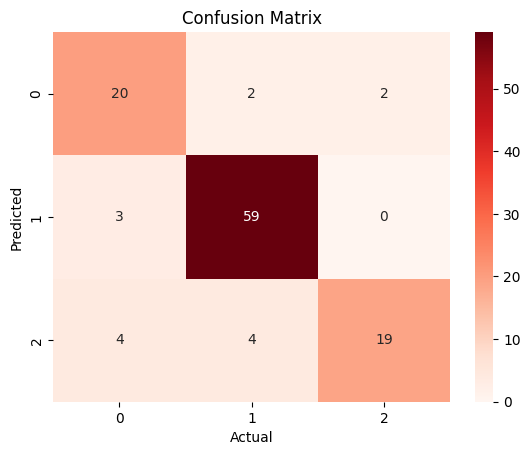

In [ ]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, d_pred), annot=True, cmap='Reds', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

**Observations:**
1. The model performs well in classifying instances of class 1.
2. The model struggles with classifying instances of class 0 and 2.
3. There are instances of false positives and false negatives.

**Actual vs Fitted Values for Sleep Disorder Prediction**

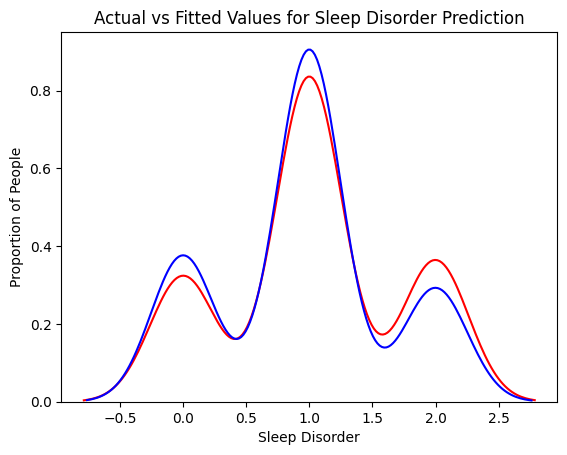

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.kdeplot(y_test, color="r", label="Actual Value")
sns.kdeplot(d_pred, color="b", label="Fitted Values", ax=ax)
plt.title('Actual vs Fitted Values for Sleep Disorder Prediction')
plt.xlabel('Sleep Disorder')
plt.ylabel('Proportion of People')
plt.show()

**Observations:**
1. Overall Shape: Both the actual and predicted distributions have a similar shape, suggesting that the model is capturing the general trend of the data.

2. Central Tendency: The peaks of both distributions are close to each other, indicating that the model's predictions are centered around the true values.

3. Spread: The predicted values appear to have a slightly wider spread compared to the actual values. This might suggest that the model's predictions are less precise than the actual values.

4. Tail Behavior: The tails of both distributions are relatively similar, suggesting that the model is able to capture the extreme values to some extent.

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, d_pred))

              precision    recall  f1-score   support

           0       0.74      0.83      0.78        24
           1       0.91      0.95      0.93        62
           2       0.90      0.70      0.79        27

    accuracy                           0.87       113
   macro avg       0.85      0.83      0.84       113
weighted avg       0.87      0.87      0.87       113



**Observations:**
1. Precision: High precision indicates that most instances classified as 1 are indeed 1.Lower precision suggests that some instances classified as 0 and 2 might be misclassified.

2. Recall: High recall indicates that most actual instances of class 1 are correctly identified.Lower recall suggests that the model misses some actual instances of class 2.Relatively high recall suggests that most actual instances of class 0 are identified.

3. F1-Score: High F1-score indicates a good balance between precision and recall.Lower F1-score suggests a need for improvement in either precision or recall.

**8. Model Training,Evaluation and Testing(Random Forest)**

Random Forest is an ensemble learning method that constructs multiple decision trees during training and merges their outputs to improve accuracy and reduce overfitting. Each tree in the forest is trained on a random subset of the data, and decisions are made by aggregating the predictions of individual trees, typically through majority voting for classification or averaging for regression. This approach increases model robustness by reducing variance and bias compared to a single decision tree. Random Forest is widely used due to its high accuracy, ability to handle large datasets, and capacity to work with both categorical and numerical features.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

Initializes a Random Forest classifier using RandomForestClassifier from sklearn.ensemble, setting the number of decision trees in the forest to 100 with the n_estimators=100 parameter. The random_state=42 ensures that the model's results are reproducible by controlling the randomness during training. This creates a robust ensemble learning model, where multiple decision trees are trained on different subsets of the data, and their predictions are aggregated for improved accuracy.

In [ ]:
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

trains the Random Forest classifier (rfc) using the feature set X_train and the target labels y_train. During this process, the model constructs multiple decision trees (as specified by n_estimators=100) on different subsets of the training data, learning patterns to make predictions.

In [ ]:
print("Training accuracy: ",rfc.score(X_train,y_train))

Training accuracy:  0.9348659003831418


Calculates and prints the training accuracy of the Random Forest classifier by measuring the proportion of correct predictions on the training data. The output Training accuracy: 0.9348659003831418 indicates that the model correctly predicted approximately 93.49% of the samples in the training set. This high accuracy suggests the model has learned the patterns in the training data well

In [ ]:
rfc_pred = rfc.predict(X_test)
rfc_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0,
       1, 1, 1, 1, 2, 1, 2, 0, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 2, 2, 0, 1, 1, 2, 0, 1, 2, 1, 1, 1, 2, 1, 2,
       1, 1, 2, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 2, 0, 1, 2, 0, 2, 1, 1,
       2, 1, 0])

Uses the trained Random Forest classifier (rfc) to generate predictions for the test dataset X_test. The predicted labels are stored in the variable rfc_pred. When you run rfc_pred, it will output an array of predicted values corresponding to each sample in the test data.

**Confusion Matrix**

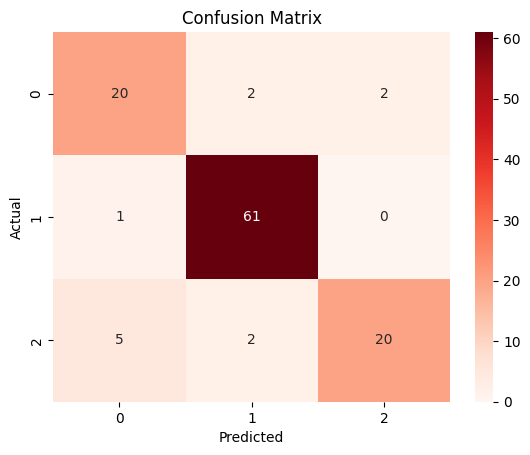

In [ ]:
sns.heatmap(confusion_matrix(y_test, rfc_pred), annot=True, cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Observations:**
1. The model performs well in classifying class 1 instances.

2. The model struggles with classifying instances of class 0 and 2.

3. There are instances of false positives and false negatives.

**Actual vs Fitted Values for Sleep Disorder Prediction**

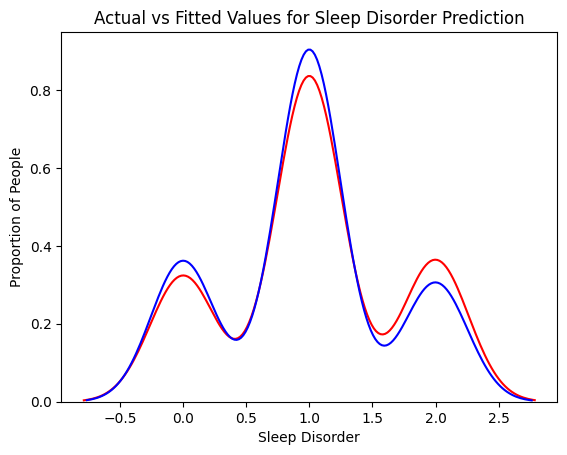

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.kdeplot(y_test, color="r", label="Actual Value")
sns.kdeplot(rfc_pred, color="b", label="Fitted Values", ax=ax)
plt.title('Actual vs Fitted Values for Sleep Disorder Prediction')
plt.xlabel('Sleep Disorder')
plt.ylabel('Proportion of People')
plt.show()

**Observations:**
1. Overall Shape: Both the actual and predicted distributions have a similar shape, suggesting that the model is capturing the general trend of the data.

2. Central Tendency: The peaks of both distributions are close to each other, indicating that the model's predictions are centered around the true values.

3. Spread: The predicted values appear to have a slightly wider spread compared to the actual values. This might suggest that the model's predictions are less precise than the actual values.

4. Tail Behavior: The tails of both distributions are relatively similar, suggesting that the model is able to capture the extreme values to some extent.

In [ ]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80        24
           1       0.94      0.98      0.96        62
           2       0.91      0.74      0.82        27

    accuracy                           0.89       113
   macro avg       0.87      0.85      0.86       113
weighted avg       0.90      0.89      0.89       113



**Observations:**
1. Precision:High precision indicates that most instances classified as 1 and 2 are indeed 1 and 2 respectively.Lower precision suggests that some instances classified as 0 might be misclassified.

2. Recall:High recall indicates that most actual instances of class 1 are correctly identified.Lower recall suggests that the model misses some actual instances of class 2.Relatively high recall suggests that most actual instances of class 0 are identified.

3. F1-Score:High F1-score indicates a good balance between precision and recall.Lower F1-score suggests a need for improvement in either precision or recall.

**9. Conclusion**

The Sleep Disorder Prediction analysis provided valuable insights into the factors contributing to sleep disorders. Key findings include:

1. Demographic Impact: Certain age groups, genders, and lifestyle factors, like work schedules and stress levels, were linked to sleep disorders, indicating the role of demographics in understanding risk factors.

2. Behavioral Patterns: Poor sleep hygiene, such as irregular sleep schedules or excessive screen time before bed, was strongly associated with sleep disorders.

3. Health and Satisfaction: Health conditions like anxiety and depression, along with dissatisfaction with healthcare services, were closely correlated with sleep disorders.

4. Predictive Modeling: Machine learning models demonstrated reasonable accuracy in predicting the likelihood of sleep disorders, offering insights into early identification.

These findings provide a deeper understanding of the key factors influencing sleep disorders, which can help inform future research and interventions.